# Traffic Fatalities Case Study Using Machine Learning

***Video explanation of this case study can be found in https://www.youtube.com/channel/UCzETboSBA0UDgytjwaIXeqA?view_as=subscriber, this Jupyter file can be found in https://github.com/lzeng11bc/MLProjectsSKLearn.***

## Problem Statement
**Traffic fatalities have remain to be a sore-throat despite the recent technological innovations. In this case study, we attempt to utilize data exploration and machine learning to predict traffic fatalities and also extract important factors**<br>
**Despite the significant technological improvements in motor vehicle sensing technologies for example, lane departure detection and collision sensing systems, traffic accidents remained a leading health issue. The WHO has estimated that road accidents has caused 1.4 million fatalities annually. With urbanization, the incidence of such crashes and their severity are on the rise. By 2030, traffic-related deaths are predicted to become the 7th leading cause of death worldwide**<br>

## Property and Casualty Insurance Companies Business Operations
**Property and casualty(P&C) insurers provide risk management services to their insured parties. For the price of an insurance premium, they protect the insured parties against losses many times greater than the premiums. The premiums are usually collected at the outset of the insurance contact, creating a float period between their receipt and the time of any payout to the insured party for losses. During the float period, the insurance company will invest the premiums, providing another income stream apart from the underwriting results.
(*Reading 16, CFA Level 2, Analysis of Financial Institutions*, CFA Level 2 Financial Reporting and Analysis, 2020 edition)**

### Objective
* **In order to enhance the underwriting operations, our object is to be able to be able to predict the underwriting process confidently**
* **Our main objective is to use a set of attributes to predict fatalities in traffic accidents. We are mainly concerned with two factors:**
    * **Out of the total fatalities, how many of them we predicted correctly**
    * **Out of the total predicted fatalities, how many of them are actual fatalities**<br>
**As a result, we have a classification problem at hand, more specifically a binary classification problem, which has two specific outcomes**
* **True: Fatal Accident**
* **False: Non Fatal Accident**

### Performance Measures
**Now, we need to select several performance measures to gauge our classifiers**
* **Precision: The fraction of relevant instances among the retrieved instances**
$$ Precision=\frac{True Positives}{True Positives+False Positives}  \,\ $$
* **Recall/Sensitivity/TPR: The fraction of the total amount of relevant instances that were actually retrieved**
$$ Recall=\frac{True Positives}{True Positives+False Negatives}  \,\ $$
* **F1 Score**
    * **The F1 score conveys the balance between the precision and the recall**
$$ F1=\frac{2*Precision*Recall}{Precision+Recall}  \,\ $$
* **Receiving Operating Characteristics(ROC)and Area Under the Curve(AUC):**
    * **Before talking about ROC,there are two additional metrics we need to introduce**
    * **Specificity measures the proportion of negatives that are correctly identified**
$$ Specifity=\frac{True Negatives}{True Negatives+False Positives}  \,\ $$
    * **False Positive Rate(FPR) is *1-Specificity***
$$ FPR=1-Specificty=\frac{True Negatives}{True Negatives+False Positives}  \,\ $$
    * **ROC plots the TPR(Recall) against FPR where FPR is on the y-axis and FPR is on the x-axis**
    * **AUC measures the degree or measure of separability, it tells how much model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0s and 1s.**

**In our case study, we will be utilizing all the metrics in choosing the best model for our binary classification problem**


## Check the Assumptions
### Fetch the data
**Luckily, the data has already been provided to us. We can start to read the data, and do some data exploration work**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df=pd.read_csv("NCDB_2014.csv")

/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2014,1,1,10,2,1,02,03,1,3,...,1,01,UUUU,01,M,75,11,2,NN,1
1,2014,1,1,12,2,1,04,UU,1,5,...,1,01,UUUU,01,F,21,11,2,02,1
2,2014,1,1,00,2,1,03,UU,7,3,...,1,01,UUUU,01,F,34,11,2,02,1
3,2014,1,1,17,2,2,21,UU,1,1,...,1,01,UUUU,01,F,50,11,2,02,1
4,2014,1,1,17,2,2,21,UU,1,1,...,2,01,UUUU,01,M,63,11,1,NN,1


In [4]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

## Data Cleaning

**From the data dictionary, we know that some of the values are not provided or unknown. We will treat all of the unknow, not provided values as na values so that we can better handle them in the data preprocessing stage**

In [6]:
na_values=['UU','XX','U','X','QQ',
               'Q','UUUU','XXXX','NN',
              'NNNN','N']

In [7]:
df=df.replace(na_values,np.nan)

## Train Test Split
* **Let's split our data in to a train set and a test set, the train/test ration is being specified as 4/1 in accordanc with machine learning conventions**

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2)

## Data exploration
**Let's check our training set to see if we are able to find any patterns**

In [9]:
##set the data fram to the training set
df=train_set

## Data Visualisation

**A straightforward and effective way of mining data pattern is to do a scatter plots of all some of the attributes against each other.<br>
Using the** scatter_matrix( ) **method from** pandas.plotting **,we can produce a scatter plots of the attributes we desired. Noted, the diagonal graph is a histogram of the distributions of each attributes**
* **In our case study, we identified several attributes that have numerical importance, including collision year/month/day/hour, the severity of collision(1 for fatal and 0 for non-fatal), and number of vehicles involved in the collision, and the year of the vehicle, and the age of the person involved in the in the collision**


In [10]:
attributes=['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS','V_YEAR','P_AGE']

**Convert the attributes to numeirc(pandas read them as objects since most of them contains strings before the na value replacement**

In [11]:
df[attributes]=df[attributes].apply(lambda x:pd.to_numeric(x))

**Plot a scatter matrix**

/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2014.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/linghao/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


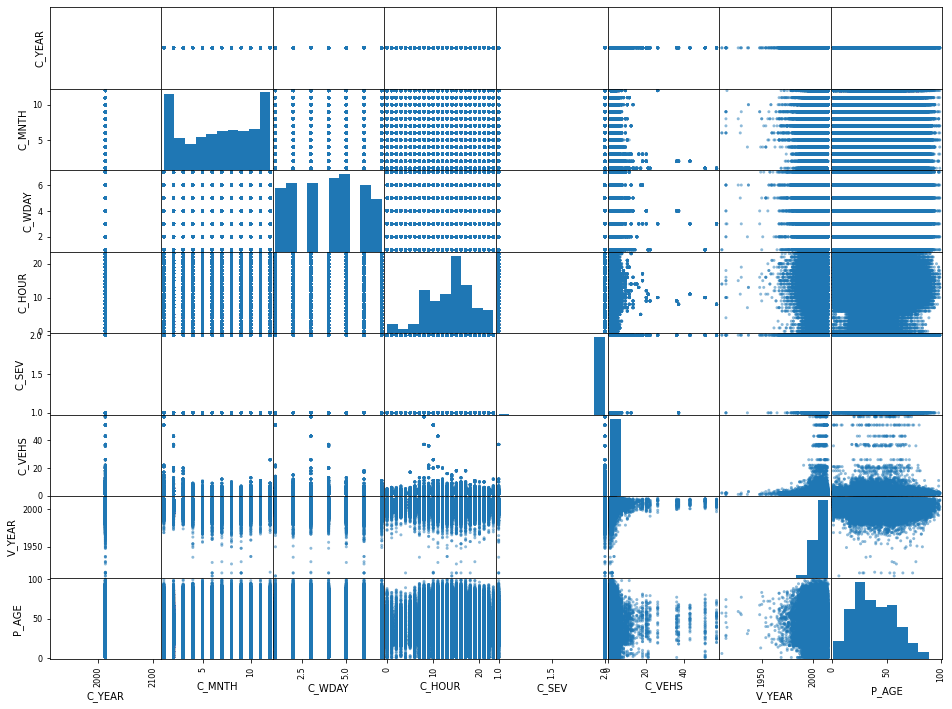

In [12]:
scatter_matrix(df[attributes],figsize=(16,12))
plt.show()

**After examining our scatter matrix, we noticed a glaring lopsided distribution on our response variable** C_SEV<br>
* **Let's zoom in on the distribution**


## Balance the Train Set

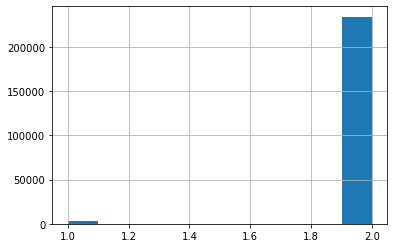

In [13]:
df['C_SEV'].hist()

**The number of fatal accidents in our training data set is almost negligible compared with the non-fatal ones!**
* **This distribution will cause havoc in our machine learning models**
    * **Because almost all of our datasets are non fatal, our model will not be able to properly learn the fatal cases. As a result, the model will not be able to properly predict fatal cases**


**We need to adjust the distribution of fatal cases in our training set. While we could remove the non-fatal cases down to a size that will result in fatal cases being significant, it is costly. After all, we are removing hard-collected data. A better way is to duplicate the fatal cases, increasing its portion in the train set.**
* **In our case, I duplicated the fatal cases 30 times, we are able to see its distribution increase significantly**


In [14]:
df_FATAL=pd.concat([df[df['C_SEV']==1]]*30,ignore_index=True)

In [15]:
df=pd.concat([df,df_FATAL],ignore_index=True)

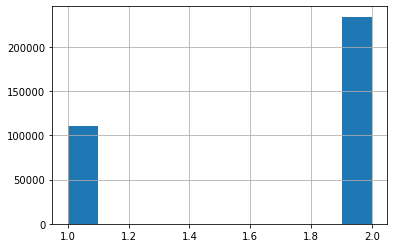

In [16]:
df['C_SEV'].hist()

**After the distriution change, we can plot the scatter matrix again, see if there is any relations that might be of interest to us**

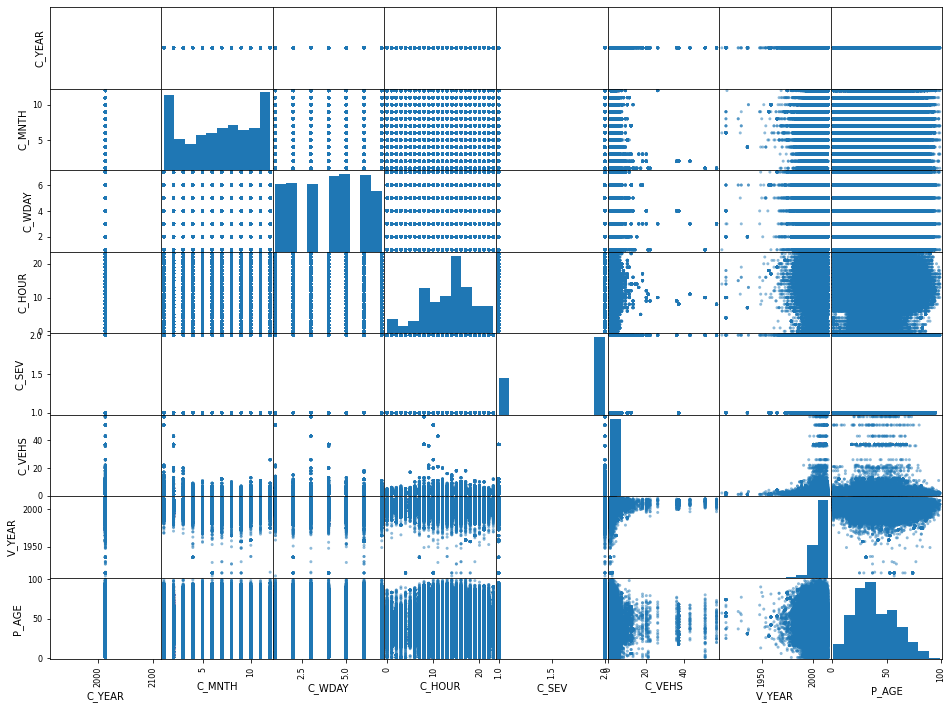

In [453]:
scatter_matrix(df[attributes],figsize=(16,12))
plt.show()

**Here, I plot a scatter graph of a person's age versus the sevevrity. It is hard to see any obvious relations**

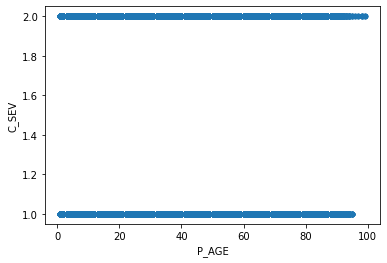

In [454]:
df.plot(kind="scatter",x='P_AGE',y='C_SEV',alpha=0.5)
plt.show()

### 4D Graph
* **I engineered feature called V_Age which is the current year minus the vehicle year.**
* **I made a scatter plot, the X_axis is the person's age, the y_plot is the number of vehicles involved, the radius of each circle is the vehicle's age, and the color of the map is the severity, which blue being fatal and red being non_fatal.**
* **Interestingly, most of the fatal cases involve 10 or less vehicles, and we see indeed more older car models are in the fatal cases**


In [456]:
df['V_AGE']=2020-df.V_YEAR

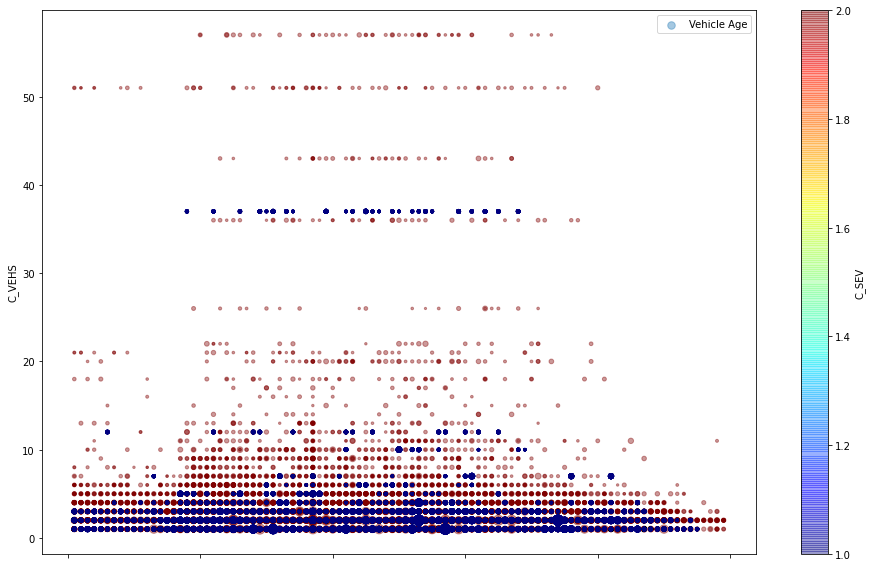

In [458]:
df.plot(kind="scatter",x='P_AGE',y='C_VEHS',alpha=0.4,
            s=df['V_AGE'],label="Vehicle Age",figsize=(16,10),
            c='C_SEV',cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()
plt.show()

## Data Preprocessing Using Pipeline
**In our case, our data contains both categorical attributes as well as non-categorical attributes.**<br>
* **We decided to build two separate pipelines, one for handling the categorical data,**(cat_pipeline) **and one for handling the numerical data.**(num_pipeline) **We then use** sklearn.compose **'s** ColumnTransformer **to combine these two pipelines**

**Handling na values**<br>
* **We use** sklearn **'s** SimpleImputer( ) **method to fill in the na values**
* **For the categorical attributes, we replace the na values with the most frequent values**
* **For the numerical attributes, we replace the na values with the mean of the values**

**Transforming to dummy variables**<br>
* **We Use sklearn's** OneHotEncoder( ) **to transform our categorical attributes to dummy variables. The output is a** SciPy **sparse matrix**

**Scaling our numerical attributes**<br>
* **We use** sklearn **'s** StandardScaler( ) **to scale our data**
* **The** StandardScaler( ) **utilizes a *Standardization*technique, it first subtracts the mean value, and then it divides by the standard deviation so that the resulting distribution has a unit variance**


In [16]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

**Create two separate pipelines, one for categorical attributes, one for the numerical attributes**

In [17]:
cat_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder()),
])

In [18]:
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("std_scaler",StandardScaler()),
])

**Identify the Categorical and Numerical attributes**

In [19]:
num_attribs=['C_YEAR','C_MNTH', 'C_WDAY', 'C_HOUR','C_VEHS','P_AGE','V_YEAR']

In [20]:
cat_attribs=['C_CONF','C_RCFG', 'C_WTHR','C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX','P_PSN', 
             'P_ISEV', 'P_SAFE', 'P_USER']

In [21]:
from sklearn.compose import ColumnTransformer

**Combine the two pipelines into a single pipeline**

In [22]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs),
])

## Transform the data for Machine Learning Models
* **First let's extract the X and y from our train set and test set(noted, the current** df **is the train set, which has a significant ratio of more fatal cases)**
* **In our y, we set all the fatal cases to** True, **and non_fatal cases to** False
* **Eventually, we transform of the X into sparse matrix using our Pipeline we built earlier**

In [23]:
X_columns=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

In [24]:
#locate the X columns
X_train=df.iloc[:,X_columns]
X_test=test_set.iloc[:,X_columns]
#transform X into models ready for machine learning
X_train_prepared=full_pipeline.fit_transform(X_train)
X_test_prepared=full_pipeline.fit_transform(X_test)

In [25]:
#y_attributes preprocessing
y_train=df.iloc[:,[4]]
y_train=y_train==1
y_test=test_set.iloc[:,[4]]
y_test=y_test==1

## Using Machine Learning to Predict Fatality
**In our Machine Learning model application, we will be first utilizing a dimensionality reduction technique(Principal Component Analysis) and then use the transformed dataset to train our models**

## Dimensionality Reduction Using PCA
**Looking at our current training set, we have 120 features**
* **These features make training extremely slow**
* **Moreover, the more dimensions in the training set, the greater the risk of overfitting** 
* **We decided to use PCA technique for our dimensionality reduction**
    * **PCA selects the *principal component*(PC) that preserves the maximum amount of variance**
    * ***Explained Variance* is the proportion of the dataset's variance that lies along each principal component**
    * **We choose the number of dimensions that add up to *95%* of the total variance**
    
**Drawback of Dimensionality Reduction**
* **Reducing dimensionality does cause some information lose. Even though it speeds up training, it may make your system perform slightly worse**


**Our X set has 120 features**

In [26]:
X_train_prepared.shape

(346359, 120)

In [27]:
from sklearn.decomposition import PCA

**Find the number of components that contain 95% of the variance**

In [28]:
pca=PCA()
pca.fit(X_train_prepared.toarray())
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [29]:
d

35

**Plotting the aggregated explained variance ratio shows that the increase in variance slows down at around 30-40 dimension range**

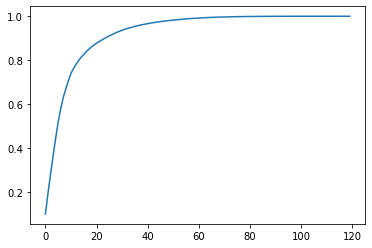

In [30]:
plt.plot(cumsum)
plt.show()

**We only need 35 dimensions to retain 95% of the variance, this will undoubtedly speed up training and machine learning process**

In [31]:
pca=PCA(n_components=35)

**We then fit and transform our** X_train. **We then transform our** X_test **based on the fit from** X_train

In [32]:
X32D_train=pca.fit_transform(X_train_prepared.toarray())

In [33]:
X32D_test=pca.transform(X_test_prepared.toarray())

## Stochastic Gradient Descent
* **The SGD can handle very large datasets very efficiently(suits our case)**
* **The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function**
    * **One draw back of gradient descent is that the result might converge in a *local minima* instead of *global minimum***
* **Stochastic Gradient Descent**
    * ***Stochastic Gradient Descent* picks a random instance in the training set a very step and computes the gradients based only on that single instance**
    * **Instead of gently decreasing the minimum, the cost function will bounce up and down, decreasing on average(stochastic)**
    * **The cost function is very irregular, this can actually help the algorithm jump our of *local minima***


**Fit a SGD Classifier**

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
sgd_clf=SGDClassifier()

In [36]:
sgd_clf.fit(X32D_train,y_train.values.ravel())

SGDClassifier()

### Performance Measurement
* ***Accuracy* is generally not a preferred performance measure for classifiers, especially when are dataset is skewed**
* **Confusion Matrix**
    * **General idea of a confusion matrix is to count the number of times instances of class A are classified as class B**
    * **We used the** k-fold-cross-validation, **returns the prediction made on each test set**


In [37]:
from sklearn.model_selection import cross_val_predict

In [121]:
y_test_predict=cross_val_predict(sgd_clf,X32D_test,y_test.values.ravel(),cv=3)

In [39]:
from sklearn.metrics import confusion_matrix

In [103]:
y_pred_sgd=sgd_clf.predict(X32D_test)

In [122]:
confusion_matrix(y_test.values.ravel(),y_pred_sgd)

array([[56981,  1649],
       [  386,   507]])

**Confusion matrix**
$$\begin{pmatrix}56981 & 1649\\\ 386 & 507\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{507}{507+1649}=0.237  \,\ $$
**Our recall is**
$$ Recall=\frac{507}{362+542}=0.56  \,\ $$

**Our confusion table shows that our model is able to predict all the non-fatal cases, impressive! But out of all 904 fatal cases, we are only able to predict 362 of them, less than 50%. Since we are interested in predicting fatalities, we should trade some recall for precision**

**Precision and Recall Trade off**
* **Increasing precision reduces recall, and increasing recall reduces precision**
* **To gain a full picture of SGD's precision and recall, we can plot the precision vs recall curve**
* **We use the** cross_val_predict( ) **function and specify the method to be** decision_function **to return the decision scores for all training instances**
* **We use** sklearn.metrics **'s** precision_recall_curve **to extract the precision and recall**
* **The** plot_precision_vs_recall **is used to plot precision and recalls**

In [153]:
#y_score is the probability of each X
y_scores=cross_val_predict(sgd_clf,X32D_train,y_train.values.ravel(),cv=3,
                          method="decision_function")

In [154]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train.values.ravel(),y_scores)

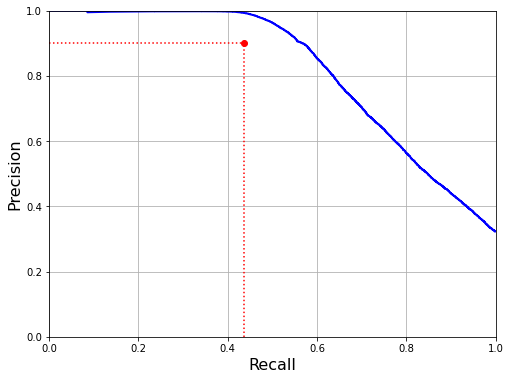

In [155]:
#plots the precision vs recall. X-axis is the precision, y_axis is the recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

**From the precision vs recall graph, our threshold is actually set appropriately. A further increase in recall will cause a significant drop in precision. It might simply be the case that a *stochastic gradient descent* is not really learning the model well enough**

**ROC Crurve**
* **In order to gain more understadings of data, let's plot a Receiver Characteristics Curve**
* **We used** sklearn.metrics **‘s** roc_curve **to get the FPR and TPR, and build a function to plot the roc_curve**
* **To get the Area Under the Curve(AUC), we used** sklearn.metrics' roc_auc_score

In [426]:
from sklearn.metrics import roc_curve

In [427]:
fpr,tpr,thresholds=roc_curve(y_train.values.ravel(),y_scores)

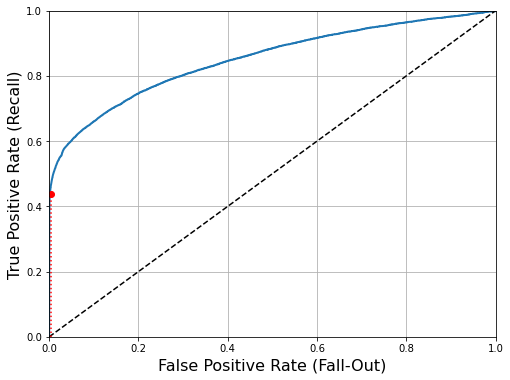

In [428]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

**SGD classifier has an AUC of 0.848**

In [136]:
roc_auc_score(y_train.values.ravel(),y_scores)

0.8480832952044769

## Ensemble Learning
* **From the SGD classifier, we see that our AUC is poor when trained using a single model. One way to improve the accuracy of our model is if we aggreagte our predictions of a group of models.**
* **From now on, I will only to utilize Ensemble Learning techniques.**

## Bagging Classifier
* **Bagging is an approach that use the same algorithm for every predictor(in this case decision tree classifier) and train them on different random subsets of the training sample. The sampling is performed with replacement**  (bootstrap=True)
* **In our case, we trained 1200 decision tree classifiers.(While we did not perform grid search, we did train 500, and 1000 classifiers), the result still underfits**
* **The bagging classifier makes predictions by simply aggregating the predictions of all predictors(the statistical mode)**
* **In general,an ensemble method has a comparable bias but a much smaller variance, this makes our decision boundary less irregular**

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
#contains an ensemble of 1200 Decision Tree classifiers
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=1200,
    max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1
)

In [45]:
bag_clf.fit(X32D_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=1200, n_jobs=-1, oob_score=True)

### Performance Measure of Bagging
**Out-of-Bag Evaluation**
* **A bagging ensemble can be evaluated using oob score**

In [46]:
bag_clf.oob_score_

0.8321442297411713

**We can also get the accuracy score on our test set**
* **Our accuracy score is around 95.57%. But since our test set is skewed, our accuracy score is not a reliable metric**

In [47]:
y_pred_bag=bag_clf.predict(X32D_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_bag,y_test.values.ravel())

0.9569914150832451

In [51]:
confusion_matrix(y_test.values.ravel(),y_pred_bag)

array([[56476,  2144],
       [  416,   487]])

**Confusion matrix**
$$\begin{pmatrix}56476 & 2144\\\ 416 & 487\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{487}{487+2144}=0.185  \,\ $$
**Our recall is**
$$ Recall=\frac{487}{487+416}=0.54  \,\ $$
**Compared with the SGD classifier, our recall has improved, but our precision has dropped significantly.**

**ROC and AUC**

In [ ]:
y_probas_bag=cross_val_predict(bag_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [63]:
y_scores_bag=y_probas_bag[:,1]

In [68]:
fpr_bag,tpr_bag,thresholds_bag=roc_curve(y_train.values.ravel(),y_scores_bag)

**The ROC has not reached the upper right corner**

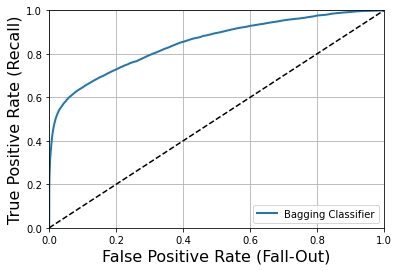

In [69]:
plot_roc_curve(fpr_bag,tpr_bag,"Bagging Classifier")
plt.legend(loc="lower right")
plt.show()

**The AUC of the Bagging Classifier is around 0.85, similar to the SGD**

In [73]:
roc_auc_score(y_train.values.ravel(),y_scores_forest)

0.8510648842778458

## Random Forests
**Random forest is an ensemble of Decision Trees, generally trained via the bagging methods. Random forest id different with regards to bagging method in the sense that:**
1. RandomForestClassifier **has all the hyperparameters of a** DecisionTreeClassifier **and** BaggingClassifier.**This allows us to apply regularization on each tree and regularization on the total number of trees grown**
1. **Random forest searches for the very best features among a subset of features when splitting a node**
1. **This allows our model to have a lower variance(less overfitting)**

**We used a random forest classifier with 900 trees, and max_leaf_nodes of 30**

In [52]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=900,max_leaf_nodes=30,n_jobs=-1)

In [53]:
rnd_clf.fit(X32D_train,y_train.values.ravel())

RandomForestClassifier(max_leaf_nodes=30, n_estimators=900, n_jobs=-1)

In [55]:
from sklearn.metrics import accuracy_score

In [54]:
y_pred_rf=rnd_clf.predict(X32D_test)

**The accuracy score of our model is around 97.18%**

In [55]:
accuracy_score(y_test.values.ravel(),y_pred_rf)

0.9718092166053458

**Again, let's get a confusion matrix to test our precision and recall**

In [56]:
confusion_matrix(y_test.values.ravel(),y_pred_rf)

array([[57362,  1258],
       [  420,   483]])

**Confusion matrix**
$$\begin{pmatrix}57362 & 1258\\\ 420 & 483\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{483}{1258+483}=0.277  \,\ $$
**Our recall is**
$$ Recall=\frac{483}{420+483}=0.534\,\ $$

**Again,let's plot the ROC curve**

In [89]:
y_probas_forest=cross_val_predict(rnd_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [90]:
y_scores_forest=y_probas_forest[:,1]

In [91]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train.values.ravel(),y_scores_forest)

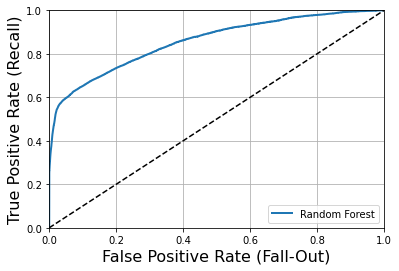

In [92]:
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

**The AUC score is 0.8568(this is the AUC score when the** n_estimators=500 **，due to the computational limit, we are not able to use** cross_val_predict **to find AUC when** n_estimators=900, **but it is safe to say it will be larger than 0.86 given the precision and recall increase**

In [93]:
roc_auc_score(y_train.values.ravel(),y_scores_forest)

0.8568257285546332

## Boosting
**The idea behind boosting is to train each predictors sequentially, each trying to correct the error of its predecessors.**

## Adaboost
* **A new predictor corrects its predictor's mistake by paying more attention to the training instances that the predecessor underfitted**
* **This resulted in new predictors focusing more on the hard cases**
* **Adaboost makes predictions using aggregation techniques(statistical mode)**
* **We used** SAMME.R **algorithm which uses class probabilities to make preictions**


In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(),n_estimators=1000,
    algorithm="SAMME.R",learning_rate=0.5,
)

In [ ]:
ada_clf.fit(X32D_train,y_train.values.ravel())

In [60]:
y_predict_ada=ada_clf.predict(X32D_test)

### Performance Measurement of Adaboost
* **The accuracy of our Adaboost algorithm is 95%**

In [61]:
accuracy_score(y_predict_ada,y_test.values.ravel())

0.9518505451674143

In [62]:
confusion_matrix(y_test.values.ravel(),y_predict_ada)

array([[56108,  2512],
       [  354,   549]])

**From Confusion matrix**
$$\begin{pmatrix}56108 & 2512\\\ 354 & 549\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{549}{549+2512}=0.179  \,\ $$
**Our recall is**
$$ Recall=\frac{549}{549+354}=0.607  \,\ $$

**ROC and AUC**

In [102]:
y_probas_ada=cross_val_predict(ada_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [103]:
y_scores_ada=y_probas_ada[:,1]

In [104]:
fpr_ada,tpr_ada,thresholds_ada=roc_curve(y_train.values.ravel(),y_scores_ada)

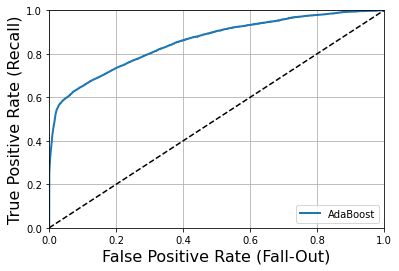

In [117]:
plot_roc_curve(fpr_forest,tpr_forest,"AdaBoost")
plt.legend(loc="lower right")
plt.show()

**The AUC of AdaBoost is 0.9017, which is better compared with our previous models**

In [106]:
roc_auc_score(y_train.values.ravel(),y_scores_ada)

0.9016928940239027

## XGBoost
* **Gradient Boost also attempts to sequentially add predictors to an ensemble, each one correcting its predecessors**
* **Instead of tweaking the instance weights at every iteration like AdaBoost, this method tries to fit the new predictor to the *residual errors* made by the previous predictor**
* **The prediction generally gets better as trees are added to the ensemble**
* **I am using Che TianQi's** xgboost **package instead of** sklearn **'s** GradientBoostingClassifier

In [242]:
import xgboost

In [243]:
xgb_clf=xgboost.XGBClassifier()

In [244]:
xgb_clf.fit(X32D_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [253]:
y_pred_xgb=xgb_clf.predict(X32D_test)

### Performance Measurement
* **The Accuracy score is around 97.59%**

In [247]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_xgb,y_test.values.ravel())

0.9779917006871294

**ROC and AUC**

In [248]:
y_probas_boost=cross_val_predict(xgb_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [254]:
y_scores_boost=y_probas_boost[:,1]

In [256]:
from sklearn.metrics import roc_curve

In [257]:
fpr_boost,tpr_boost,thresholds_boost=roc_curve(y_train.values.ravel(),y_scores_boost)

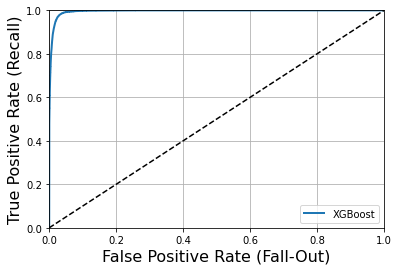

In [260]:
plot_roc_curve(fpr_boost,tpr_boost,label="XGBoost")
plt.legend(loc="lower right")
plt.show()

**The AUC is 0.9957**

In [118]:
roc_auc_score(y_train.values.ravel(),y_scores_boost)

0.9957304328125807

In [119]:
confusion_matrix(y_test.values.ravel(),y_pred_xgb)

array([[57557,  1062],
       [  373,   531]])

**Confusion matrix**
$$\begin{pmatrix}57557 & 1062\\\ 373 & 531\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{531}{531+1062}=0.33  \,\ $$
**Our recall is**
$$ Recall=\frac{531}{531+373}=0.587\,\ $$

## Ensemble Voting Classifier
**Finally, we decided to aggregate the predictions of four of our classifiers(xgboost, adaboost,bagging, and random forest) and predict the class with the highest probabilities, averaged over all individual classifiers**<br>
* **We are utilizing** "soft voting" **, which aggregates all the probabilities predicted by each predictor and makes a prediction based on the aggregated probabilities**
* **There are several drawbacks**
    1. **Because most classifiers are trained on the same data, they are more likely to make the same type of errors, so there will be many majority vote for the wrong classes**
    1. **Since random forest and bagging are similar, they are more likely to produce similar results**
    1. **Training an voting classifier takes much longer time**


In [137]:
from sklearn.ensemble import VotingClassifier

In [138]:
voting_clf=VotingClassifier(
    estimators=[('xgb',xgb_clf),('ada',ada_clf),('rnd',rnd_clf),('bag',bag_clf)],
    voting='soft'
)

In [139]:
voting_clf.fit(X32D_train,y_train.values.ravel())

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_...
                                            validate_parameters=1,
                                            ver

In [140]:
y_pred_vot=voting_clf.predict(X32D_test)

### Performance Measurement
**The ensemble voting classifier has an accuracy score of 98%.**

In [141]:
accuracy_score(y_pred_vot,y_test.values.ravel())

0.9800917292475178

In [142]:
confusion_matrix(y_test.values.ravel(),y_pred_vot)

array([[57843,   776],
       [  409,   495]])

**From Confusion matrix**
$$\begin{pmatrix}57557 & 1062\\\ 373 & 531\end{pmatrix}$$
**our precision is**
$$ Precision=\frac{495}{495+776}=0.389 \,\ $$
**Our recall is**
$$ Recall=\frac{495}{495+409}=0.5476  \,\ $$

**ROC curve**

In [ ]:
y_probas_vot=cross_val_predict(voting_clf,X32D_train,y_train.values.ravel(),cv=3,
                                 method="predict_proba")

In [ ]:
y_scores_vot=y_probas_vot[:,1]

In [ ]:
fpr_vot,tpr_vot,thresholds_vot=roc_curve(y_train.values.ravel(),y_scores_vot)

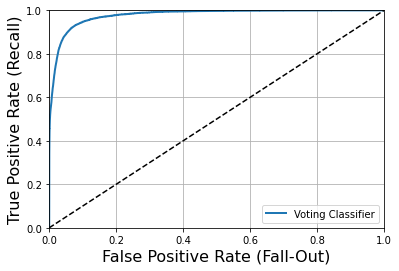

In [146]:
plot_roc_curve(fpr_vot,tpr_vot,label="Voting Classifier")
plt.legend(loc="lower right")
plt.show()

**Our AUC is 0.9776**

In [147]:
roc_auc_score(y_train.values.ravel(),y_scores_vot)

0.9775899941658871

## Selecting the Best Model
**Out of all the models, there are two front runners,XGboost and our Voting Classifier that composes all the models.**
* **Metrics of the XGBoost model**
**Confusion matrix is**
$$\begin{pmatrix}57557 & 1062\\\ 373 & 531\end{pmatrix}$$
**Precision is**
$$ Precision=\frac{531}{531+1062}=0.33  \,\ $$
**Our recall is**
$$ Recall=\frac{531}{531+373}=0.587\,\ $$
**AUC is**
$$ AUC={0.9957}\,\ $$
**F1 score is**
$$ F1={0.4225}\,\ $$
* **Metrics of the voting classifier model**
**Confusion matrix is**
$$\begin{pmatrix}57557 & 1062\\\ 373 & 531\end{pmatrix}$$
**Precision is**
$$ Precision=\frac{495}{495+776}=0.389 \,\ $$
**Our recall is**
$$ Recall=\frac{495}{495+409}=0.5476  \,\ $$
**AUC is**
$$ AUC={0.9776}\,\ $$
**F1 score is**
$$ F1={0.4549}\,\ $$
* **While the XGboost has a higher AUC than the voting classifier, the voting classifier has a slightly higher F1 score. It all comes down to the metrics we would like to use in selecting the best model. But what does these all mean?**
* **It means that the XGboost is more adapt at distinguishing between fatal and non-fatal cases, while the voting classifier model is has a more balanced precision and recall**
* **Our objective is to find a model that helps us predict fatal cases, so AUC is a more appropriate metric. As a result, *WE CHOOSE XGboost CLASSIFIER AS OUR BEST MODEL***


**Viola!! We have selected our best model!** 

# Fine tune our best Model

**In order to further increase the performance of our XGBoost model, let's manually set the threshold of our xgboost model**
* **First, let's plot the precision recall against the threshold**

In [430]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train.values.ravel(),y_scores_boost)

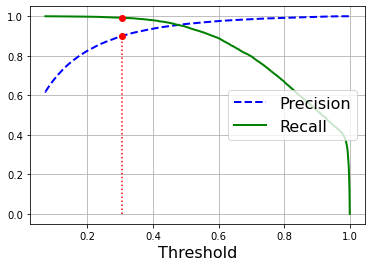

In [431]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="center right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)        
plt.grid(True)                             

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")               

plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")   
plt.show()

**Let's adjust the test threshold to a extent that allows us to have a more balanced precision and recall**


**According to the graph, let's try to gain some precision while sacrificing as little recall as possible**

In [873]:
threshold_precision_xgb=thresholds[np.argmax(precisions>=0.983)]   

In [874]:
y_scores_train=xgb_clf.predict_proba(X32D_train)

In [875]:
y_train_pred_95=(y_scores_train>=threshold_precision_xgb)[:,1]

In [876]:
confusion_matrix(y_train.values.ravel(),y_train_pred_95)

array([[233335,   1145],
       [ 19127,  92752]])

In [877]:
f1_score(y_train.values.ravel(),y_train_pred_95)

0.9014851100225488

**Let's apply the threshold to the test set**

In [859]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [860]:
y_test_pred_95=(y_scores_test>=threshold_precision_xgb)[:,1]

In [861]:
confusion_matrix(y_test.values.ravel(),y_test_pred_95)

array([[58295,   335],
       [  442,   451]])

In [862]:
precision_score(y_test.values.ravel(),y_test_pred_95)

0.573791348600509

In [863]:
recall_score(y_test.values.ravel(),y_test_pred_95)

0.5050391937290034

In [864]:
f1_score(y_test.values.ravel(),y_test_pred_95)

0.5372245384157237

* **In the end, we adjust the threshold where the model on the train set will have a precision of 0.983**
* **We then observe our model's performance on the test set which**
**Confusion matirx is**
$$\begin{pmatrix}58295 & 335\\\ 442 & 451\end{pmatrix}$$
$$ Precision={0.567}  \,\ $$
**Our recall is**
$$ Recall={0.507} \,\ $$
**F1 score is**
$$ F1={0.537}\,\ $$
* **We have dramatically improved the f1 score of our model sacrificing little in recall**

## Business Solutions and Recommendations

### Earning Characteristics of P&C Insurance
* **In a macro view, the property and casualty insurance business is cyclical. It is a price-sensitive business, with many competitions unafraid of cutting prices in order to gain market share. According to A.M. Best, there are approximately 1,200 property and casualty groups in the United States, comprising approximately 2,650 property and insurance companies. Out of these groups, the top 150 accounts for approximately 92% of the consolidated industry's total net written premiums in 2015.**
* **In a micro view, there are operating cost considerations that affect insurer profitability. Direct writers have higher fixed costs because of the in-house nature of their distribution method. Agency writers do not have this fixed cost; instead, the commissions paid to agents and brokers are variable cost**
* **P&C insurers' investment income is not as volatile as their operating income, because the investments are relatively low-return, low-risk holdings**
* **One critical expense for property and casualty insurers results form the management of their loss reserves. Proper estimation of liabilities is essential to the pricing of policies. Underestimation of loss reserves may lead to under changing for risks assumed. Development of the loss reserves is based on historical information, yet the process also incorporates estimates about future losses.**
* **The loss reserves is a material account that is subject to management discretion, and its improper estimation can have consequences for the property and casualty insurer**
* **if the loss serves and the annual adjustments to them are optimistic, the pricing of the insurer's policies may be insufficient for the risk being born by the insurer If the loss reserved and the annual adjustments to them are too optimistic, the pricing of the insurance policies may be insufficient for the risk being borne by the insurer and insolvency may ensue(*Reading 16, CFA Level 2, Analysis of Financial Institutions*, CFA Level 2 Financial Reporting and Analysis, 2020 edition)**
### Analysis Using Machine Learning
**Our whole project is focused on applying machine learning techniques to predict fatalities of the traffic accident. The more accurate prediction, the more likely the insurance companies can adjust their loss reserves based on our predictions**
* **Based on our current accuracy, we are able to beat the accuracy of guessing all cases to be non-fatal:**
$$ {Accuracy}={0.987}  \,\ $$
* **We are able to predict over half of the fatal cases while maintaining the incorrectly predicted fatal cases extremely low(*precision=0.567*). This means that if BIB utilizes our prediction model, they will be able to utilize discriminatory pricing practice to a greater extend.**
    * **Based on our previous discussion on the earning characteristics of insurance industry, the industry is highly cyclical. With companies practicing soft and hard pricing strategy. While industry leaders, endowed with giant capital, is able to practice "soft pricing"-lower their premiums-indiscriminately, this is highly inefficient. A better approach is to single out the "high-risk" group, charge them with the premium, while also charging the low-risk group at a lower price. This practice gives insurance companies the flexibility to adapt a "soft pricing" strategy while still being able to maintain their profitability**
    * **As a result, a good prediction model should be the one that can balance the number of True positives and False positives. Given a new client, the insurance company should be able to identify the category of fatal and non-fatal it will fall in. Over an aggregated set of records, the insurance company is also hoping that the number of fatal cases it predicted incorrectly and the number of fata cases it ignored balanced out each other(recall is approximately equal to precision), so that the insurance company is able to retrieve most of the premiums it needed**
    * **Yet, if a prediction model sacrifices too much precision for recall-that is, the model is able to identify most of the cases, but also makes significant errors in incorrectly identifying fatal cases, the insurance company will likely charge a lot more clients premiums even though they will not be involved in fatal accidents. As a result, a good prediction model still needs to have a high accuracy score with good precision and recall.**

### Recommendations to BIB
**If BIB utilizes our current prediction model, they will be able to identify the fatal cases and charge them with a premium. This approach will help BIB gain competitive advantage, and also drive down the costs during the down cycle**


## Conclusion
**In the end, we are able to build a model that has a recall of 0.507, and a precision of 0.567. That is, we are able to correctly predict more than half of the total fatal cases in our test set, while simultaneously keeping the number of incorrectly predicted the non-fatal cases low.**<br>
**This is an impressive result considering fatal-cases is only about 1.5% of the total instances in the test set.**
